In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# more imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "HW7"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# Warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
print(os.getcwd())

C:\Users\ainspector.BH\Downloads


In [3]:
import sys
!conda install --yes --prefix {sys.prefix} pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ainspector.BH\App\anaconda3

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.8                |           py37_0         1.7 MB
    pydotplus-2.0.2            |           py37_1          42 KB
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-py37_1 

The following packages will be UPDATED:

    conda:     4.5.12-py37_0 --> 4.6.8-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



conda-4.6.8          | 1.7 MB    |            |   0% 
conda-4.6.8          | 1.7 MB    | ##7        |  27% 
conda-4.6.8          | 1.7 MB    | ###2       |  33% 
conda-4.6.8          | 1.7 MB    | ###7       |  38% 
conda-4.6.8          | 1.7 MB    | ####9      |  50% 
conda-4.6.8          | 1.7 MB    | ######2    |  62% 
conda-4.6.8          | 1.7 MB    | #######7   |  77% 
conda-4.6.8          | 1.7 MB    | ########1  |  81% 
conda-4.6.8          | 1.7 MB    | ########7  |  87% 
conda-4.6.8          | 1.7 MB    | ########9  |  90% 
conda-4.6.8          | 1.7 MB    | #########2 |  92% 
conda-4.6.8          | 1.7 MB    | #########5 |  95% 
conda-4.6.8          | 1.7 MB    | #########9 |  99% 
conda-4.6.8          | 1.7 MB    | ########## | 100% 

pydotplus-2.0.2      | 42 KB     |            |   0% 
pydotplus-2.0.2      | 42 KB     | ########## | 100% 


Prepare the data. Load breast cancer data

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.target[0:20])
print(list(cancer.target_names))
print(cancer.data[0:5])
print(list(cancer.feature_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
['malignant', 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 

# Problem 1. 
Break the data into training (80%)/testing data(20%). Estimate a tree classification model with maximum depth of 2. Plot the tree and calculate the accuracy rate. Predict target using all features, don't forget to set random numbers to 42. 

In [10]:
# Starting point
X = cancer.data 
y = cancer.target
random.seed(42)   
os.environ["PATH"] += os.pathsep + "C:/Users/ainspector.BH/programs/graphviz-2.38/release/bin/"

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
X.shape

(569, 30)

In [13]:
y.shape

(569,)

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="cancer_tree1.dot",
        feature_names=cancer.feature_names[:],
        class_names=cancer.target_names,
        rounded=True,
        filled=True
    )

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

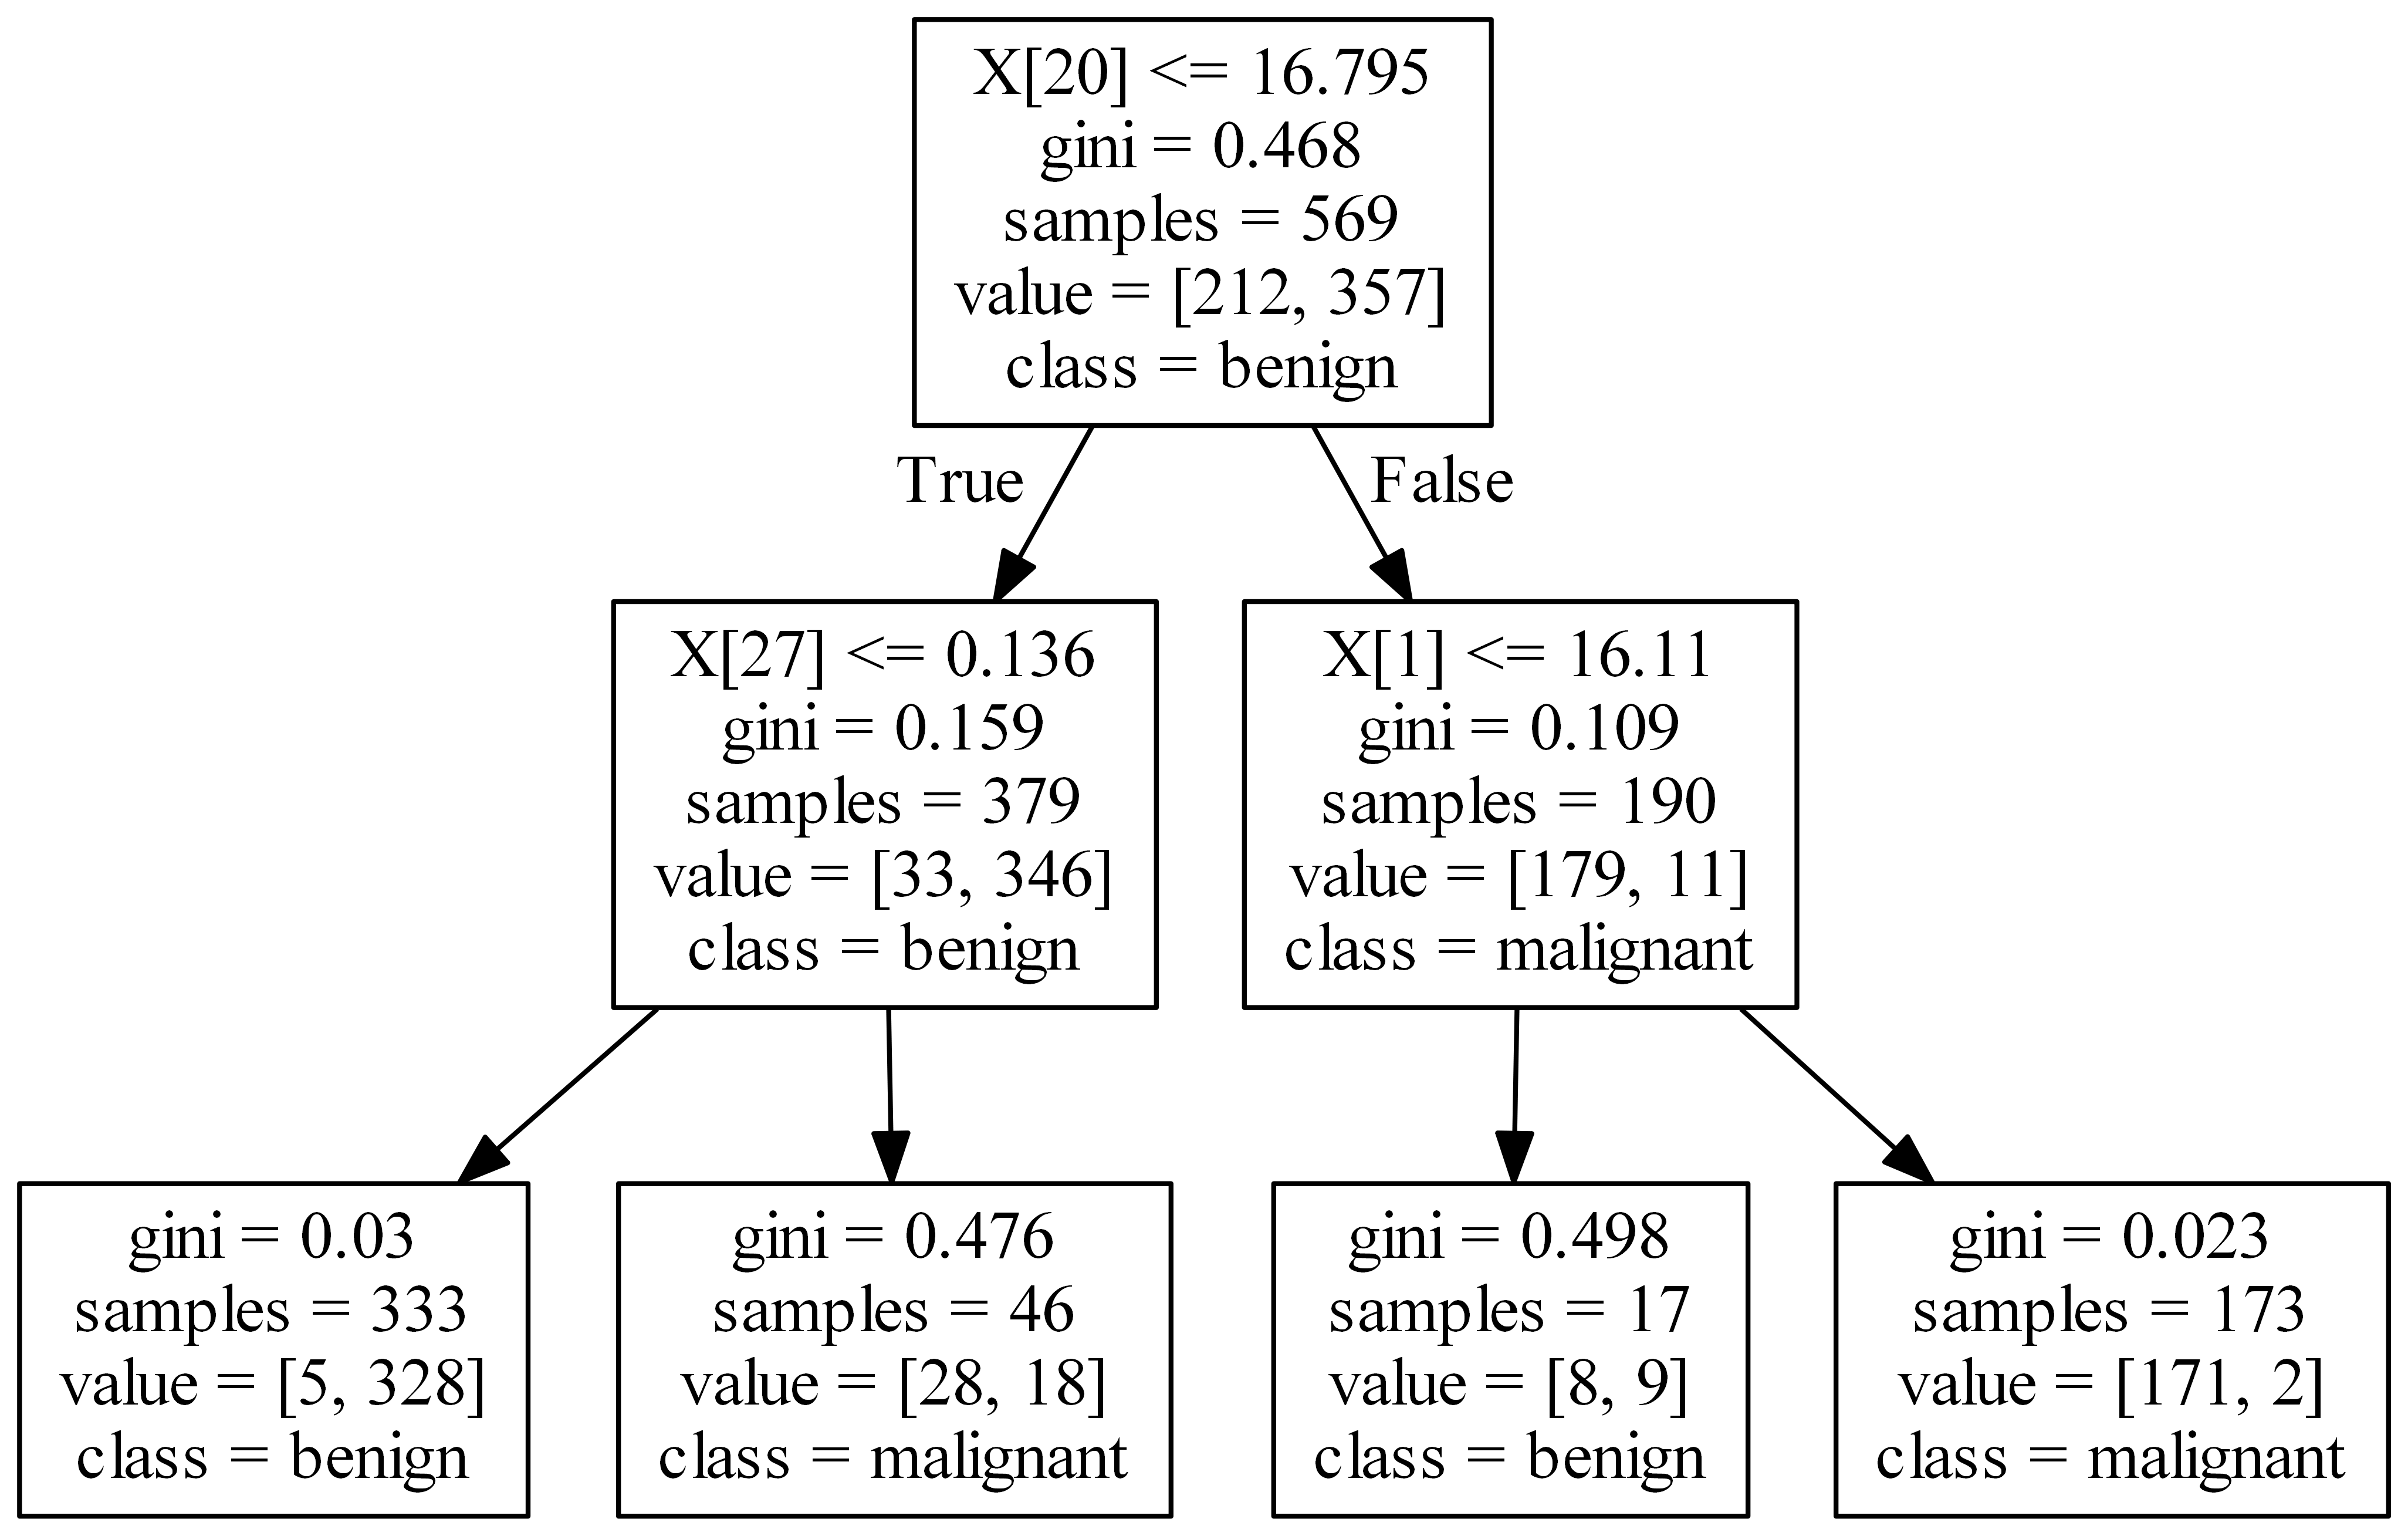

In [24]:
dot_data = tree.export_graphviz(tree_clf, out_file='tree1.dot', 
                                class_names=cancer.target_names)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree1.png')

In [27]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'grid_search_cv' is not defined

Problem 2: 
Estimate an unrestricted tree using full data (training + testing). Find two most important features and create a scatter plot of malignant and benign tumors along the two axes of two most important feature. Hint: For example of a graph look at:
https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels
Do you think the data need rotation?

In [25]:
tree2_clf = DecisionTreeClassifier(max_depth=2)
tree2_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree2_reg1 = DecisionTreeRegressor(random_state=42)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree2_reg1.predict(x1) #NotFittedError: This DecisionTreeRegressor instance is not fitted yet. 
y_pred2 = tree2_reg2.predict(x1) #Call 'fit' with appropriate arguments before using this method.

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Problem 3
Find approximately optimal rotation angle of the two most important features. Rotate them. Plot in in the scatter plot. Hint angle is measure in Pi's use fractions.

 # Problem 4
In the main data drop variables used in the problem 3. Add instead the rotated variables (substitution). 
Estimate accuracy score using with a tree classifier with max depth = 2 (Same as in problem 1). How much did we gain from rotation?

# Problem 5
Generate samples of 100, 10,000 and 100,000, moons using the code below. Set random seed at 42. Split data in training and testing sets. Estimate separately Logistic, Random Forest, SVC and the hard voting classifier. What happens to the accuracy score as you increase the number of observations?  I want you also to "feel" the slowness of SVM even with moderate data. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Problem 6
Generate data using the code provided below. Using testing accuracy as metric, estimate bagging random trees estimator with 200 estimators. Try different numbers of samples: 10, 100, 300, and 1000. What is optimal number of samples to be used? <br>
BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    max_samples= ?, bootstrap=True, n_jobs=-1, random_state=42)

In [ ]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Problem 7
Use data from the last problem. Find optimal learning rate, number of estimators and maximum depth using GradientBoostingRegressor,and Randomize grid search. Set a grid: number of estimators from 1 to 10, and maximum depth from 1 to 10. Set learning_rate = 0.1. Try 100 iterations. Example for randomizeSearch:

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=?, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbrt = GradientBoostingClassifier(max_depth=?, n_estimators=?, learning_rate = 0.1, random_state=42)  

Which estimator was the best? What was the accuracy of the best estimator?


In [ ]:
X, y = make_moons(n_samples=2000, noise=0.40, random_state=42)